In [1]:
import os
import zipfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/face_age_K.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [4]:
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
base_dir = '/content/adult_and_teen'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
print(train_dir)   
print(validation_dir) 
print(test_dir) 

/content/adult_and_teen/train
/content/adult_and_teen/validation
/content/adult_and_teen/test


In [6]:
train_adult_dir = os.path.join(train_dir,'adult_train')
train_teen_dir = os.path.join(train_dir,'teen_train')
print(train_adult_dir)     
print(train_teen_dir)      

/content/adult_and_teen/train/adult_train
/content/adult_and_teen/train/teen_train


In [7]:
validation_adult_dir = os.path.join(validation_dir,'adult_validation')
validation_teen_dir = os.path.join(validation_dir,'teen_validation')
print(validation_adult_dir) 
print(validation_teen_dir)      

/content/adult_and_teen/validation/adult_validation
/content/adult_and_teen/validation/teen_validation


In [8]:
test_adult_dir = os.path.join(test_dir,'adult_test')
test_teen_dir = os.path.join(test_dir,'teen_test')
print(test_adult_dir) 
print(test_teen_dir)   

/content/adult_and_teen/test/adult_test
/content/adult_and_teen/test/teen_test


In [9]:
train_adult_fnames=os.listdir(train_adult_dir)
train_teen_fnames=os.listdir(train_teen_dir)

print(train_adult_fnames[:5])
print(train_teen_fnames[:5])

['4629.png', '3178.png', '2583.png', 'k001.jpg', '6450.png']
['5423.png', '205.png', '6029.png', '4636.png', '6043.png']


In [10]:
print("학습용 성인 사진의 수:",len(train_adult_fnames))
print("학습용 학생 사진의 수:",len(train_teen_fnames))

학습용 성인 사진의 수: 2000
학습용 학생 사진의 수: 1024


In [11]:
validation_adult_fnames = os.listdir(validation_adult_dir)
validation_teen_fnames = os.listdir(validation_teen_dir)

print(validation_adult_fnames[:5])
print(validation_teen_fnames[:5])

['7077.png', '6943.png', '8613.png', '8469.png', '9018.png']
['7432.png', '7542.png', '21.PNG', '8998.png', '8520.png']


In [12]:
print("검증용 성인 사진의 수:",len(validation_adult_fnames))
print("검증용 학생 사진의 수:",len(validation_teen_fnames))

검증용 성인 사진의 수: 1050
검증용 학생 사진의 수: 550


In [13]:
test_adult_fnames = os.listdir(test_adult_dir)
test_teen_fnames = os.listdir(test_teen_dir)

print(test_adult_fnames[:5])
print(test_teen_fnames[:5])

['9714.png', '2175.png', 'k144.jpg', 'k105.jpg', '9753.png']
['1738.png', '1808.png', '1357.png', '1486.png', '1285.png']


In [14]:
print("시험용 성인 사진의 수:",len(test_adult_fnames))
print("시험용 학생 사진의 수:",len(test_teen_fnames))

시험용 성인 사진의 수: 150
시험용 학생 사진의 수: 150


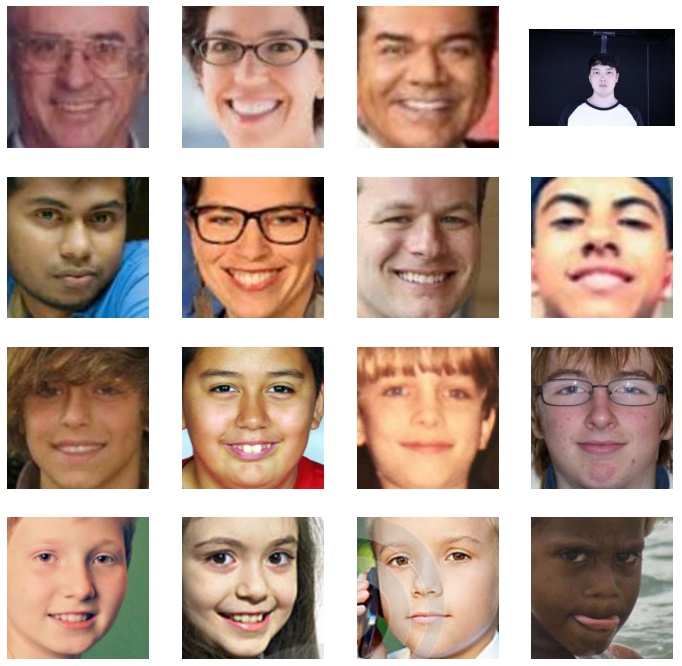

In [15]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_adult_pix = [os.path.join(train_adult_dir, fname)for fname in train_adult_fnames[ pic_index-8:pic_index]]
next_teen_pix = [os.path.join(train_teen_dir, fname)for fname in train_teen_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_adult_pix+next_teen_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=((1./127.5)-1))

test_datagen = ImageDataGenerator(rescale=((1./127.5)-1))

In [17]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(96,96),
                                                    class_mode = 'binary')

Found 3024 images belonging to 2 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              target_size=(96,96),
                                                              class_mode = 'binary')

Found 1600 images belonging to 2 classes.


In [19]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=20,
                                                  target_size=(96,96),
                                                  class_mode = 'binary')

Found 300 images belonging to 2 classes.


In [38]:
from tensorflow.keras.applications import MobileNetV2

MobileNetV2 = MobileNetV2(weights = 'imagenet', input_shape = (96, 96, 3), include_top = False)
MobileNetV2.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 48, 48, 32)   0           bn_Conv1[0][0]                   
________________________________________________________________________________

In [39]:
for layer in MobileNetV2.layers[:-10]:
    layer.trainable = False

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Activation, Dropout, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
model = Sequential()
model.add(MobileNetV2)
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), activation='relu',
                        input_shape=(96, 96, 3)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', 
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [49]:
def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size + 1
    else:
        return train_len // batch_size

In [51]:
history = model.fit(
      train_generator,
      steps_per_epoch=get_step(2000, 40),
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
41/50 [=======================>......] - ETA: 0s - loss: 0.2349 - acc: 0.9195

KeyboardInterrupt: ignored

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(test_generator)